In [6]:
from netCDF4 import Dataset, num2date 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as dates
from datetime import datetime
import matplotlib as mpl
import netCDF4 as nc4
import sys
import warnings
warnings.filterwarnings('ignore')

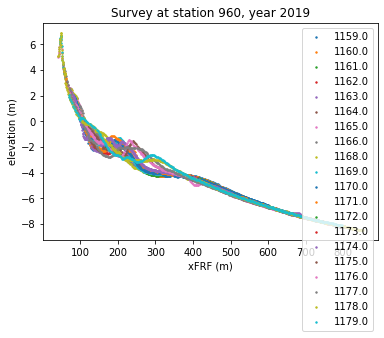

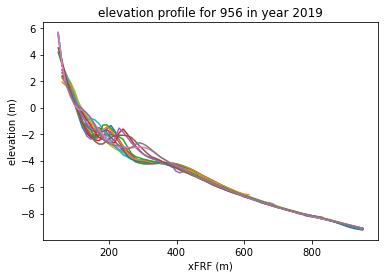

132
[1159. 1160. 1161. 1162. 1163. 1164. 1165. 1166. 1168. 1169. 1170. 1171.
 1174. 1175. 1176. 1177. 1178. 1179.]


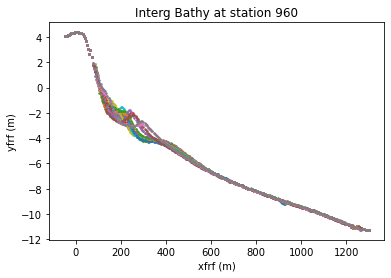

In [7]:
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey")   
    


filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey/" + i for i in files]
firstDataset = nc4.Dataset(filefull[0])
#print(filefull[0])
#print(filefull[-1])
elv = []
time = []
xfrf=[]
yfrf=[]
pnum=[]
snum=[]
x960 = []
elv960 = []
s960 = []

p,axs = plt.subplots()

for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time.append(np.array(currDataset['time'][:]))
    xfrf.append(np.array(currDataset['xFRF'][:]))
    yfrf.append(np.array(currDataset['yFRF'][:]))
    pnum.append(np.array(currDataset['profileNumber'][:]))
    inds = np.where(pnum[i]==960) #survey of interest
    snum.append(np.array(currDataset['surveyNumber'][0]))
    elv.append(np.array(currDataset['elevation'][:]))
    x960.append(xfrf[i][inds])
    s960.append(snum[i])
    elv960.append(elv[i][inds])
    plt.scatter(x960[i],elv960[i],s=2,label=str(s960[i]))#plot elevation profile for this survey
    plt.xlabel('xFRF (m)')
    plt.ylabel('elevation (m)')
    plt.title('Survey at station 960, year 2019')
    plt.legend()
    


plt.show()


import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019")

    
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019/" + i for i in files]


firstDataset = nc4.Dataset(filefull[0])
yFRF = firstDataset["yFRF"][:]
xFRF = firstDataset["xFRF"][:]
ind_956 = np.where(yFRF==956) #choose survey location

elevation956 = []
time2 = []
z_956 = []


p,axs = plt.subplots()
for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time2.append(currDataset['time'][:])
    elevation956.append(currDataset['elevation'][0,yFRF==956,:].flatten())
    axs.plot(xFRF,elevation956[i])
    plt.xlabel('xFRF (m)')
    plt.ylabel('elevation (m)')
    
  
    plt.title("elevation profile for 956 in year 2019")
    if i==0:
        janelevation = currDataset['elevation'][0,:,:]
    

#print(elevation956[0])
plt.show()
        
ibath=Dataset('https://chldata.erdc.dren.mil/thredds/dodsC/cmtb/integratedBathyProduct/survey/survey.ncml')

tt=ibath['time']
l=len(tt)
print(l)
timedm=num2date(tt[:],units=tt.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
dtstart=datetime(2019, 1, 1, 0, 0, 0)
dtend=datetime(2020, 1, 1, 0, 0, 0)
dnstart = dates.date2num(dtstart)
dnend = dates.date2num(dtend)
ptime= dates.date2num(timedm)
dates = (ptime >= dnstart) & (ptime <= dnend)


find = np.where(dates > 0)
find=find[0]
#print(find)
snum2=ibath['surveyNumber'][:]
xfrf2=ibath['xFRF'][:]
yfrf2=ibath['yFRF'][:]
time2=ibath['time'][:]

time2019=time2[dates]
survey2019=snum2[dates]

#print(survey2019[:])
ind_960 = np.where(yfrf2==960.0)
index960=ind_960[0]

ll=len(time2019)
#print(ll)
elv2019ib=ibath['elevation'][find,index960,:]
elvall=ibath['elevation'][115,:,:]#all locations first survey of 2019
#print(elvall[:3])
for i in range(ll):
    plt.scatter(xfrf2,elv2019ib[i,0,:],s=2)
    plt.xlabel('xfrf (m)')
    plt.ylabel('yfrf (m)')
    plt.title('Interg Bathy at station 960')
plt.show()


In [ ]:
print(index960)


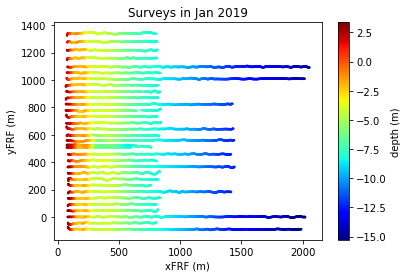

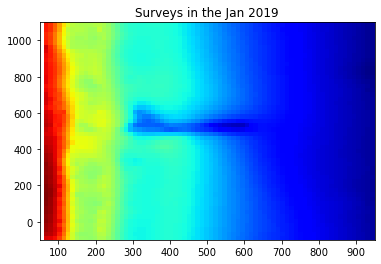

[[  3.8515625   3.890625    3.9296875 ... -12.1328125 -12.1484375
  -12.1640625]
 [  3.8515625   3.890625    3.9296875 ... -12.125     -12.1484375
  -12.1640625]
 [  3.8515625   3.890625    3.9296875 ... -12.1171875 -12.140625
  -12.15625  ]
 ...
 [  3.8515625   3.890625    3.9296875 ... -12.1015625 -12.125
  -12.140625 ]
 [  3.8515625   3.890625    3.9375    ... -12.09375   -12.1171875
  -12.1328125]
 [  3.8515625   3.890625    3.9375    ... -12.09375   -12.109375
  -12.1328125]]
(1040, 271)


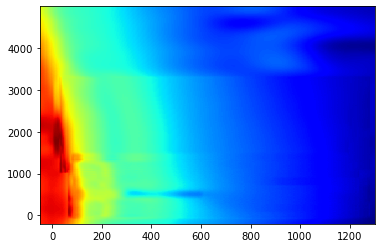

In [8]:

fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(elv[0]),vmin=np.amin(elv[0]))

ax0 = fig.add_subplot(1, 1, 1), plt.scatter(xfrf[0],yfrf[0],2,elv[0],norm=norm,cmap='jet')
ax0[0].set_xlabel('xFRF (m)')
ax0[0].set_ylabel('yFRF (m)')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='jet'),ax=ax0[0])
cbar.set_label('depth (m)')


ax0[0].set_title("Surveys in Jan 2019")
plt.show()


fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(janelevation),vmin=np.amin(janelevation))

X, Y = np.meshgrid(xFRF,yFRF)
plt.pcolormesh(xFRF,yFRF,janelevation,norm=norm,cmap='jet')
'''
ax0 = fig.add_subplot(1, 1, 1)
ax0[0].set_xlabel('xFRF (m)')
ax0[0].set_ylabel('yFRF (m)')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='jet'),ax=ax0[0])
cbar.set_label('depth (m)')
'''

plt.title("Surveys in the Jan 2019")
plt.show()

print(elvall[1:10])

fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(elv2019ib[0,:,:]),vmin=np.amin(elv2019ib[0,:,:]))
print(np.shape(elvall))
plt.pcolormesh(xfrf2,yfrf2,elvall,cmap='jet')


#ax0[0].set_title("Surveys in the dec 2019")
plt.show()


In [ ]:

dtstart=datetime(2019, 1, 1, 0, 0, 0)
dtend=datetime(2020, 1, 1, 0, 0, 0)

dnstart = dates.date2num(dtstart)
dnend = dates.date2num(dtend)


In [ ]:
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019")

    
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019/" + i for i in files]
#f=nc4.MFDataset([filefull[0],filefull[1]])
#t=f.variables["time"]
#print(len(t))

firstDataset = nc4.Dataset(filefull[0])
yFRF = firstDataset["yFRF"][:]
xFRF = firstDataset["xFRF"][:]
ind_956 = np.where(yFRF==956)

elevation956 = []
time = []
z_956 =[]

#p,axs = plt.subplots(

for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time.append(currDataset['time'][:])
    elevation956.append(currDataset['elevation'][0,yFRF==956,:].flatten())
    axs[0].plot(xFRF,elevation956[i])
    axs[0].set_xlabel('xFRF (m)')
    axs[0].set_ylabel('elevation (m)')
    axs[0].set_title('survey 2019')
    plt.legend()
    #plt.title("DEM elevation profile for 956")
    if i==0:
        janelevation = currDataset['elevation'][0,:,:]
    

print(elevation956[0])
plt.show()
        
    


In [ ]:
fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(janelevation),vmin=np.amin(janelevation))

X, Y = np.meshgrid(xFRF,yFRF)
plt.pcolormesh(xFRF,yFRF,janelevation,norm=norm,cmap='jet')
plt.xlabel('xfrf (m)')
plt.ylabel('yfrf (m)')
plt.title('DEM survey Jan 2019')
plt.show()

In [ ]:
ibath=Dataset('https://chldata.erdc.dren.mil/thredds/dodsC/cmtb/integratedBathyProduct/survey/survey.ncml')
ttt=ibath['time']
timedm2=num2date(ttt[:],units=ttt.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)

In [ ]:
ptime2= dates.date2num(timedm2)
dates2 = (ptime2 >= dnstart) & (ptime2 <= dnend)
find = np.where(dates2 > 0)
find=find[0]
print(find)

In [ ]:
snumib=ibath['surveyNumber'][:]
xfrfib=ibath['xFRF'][:]
yfrfib=ibath['yFRF'][:]
timeib=ibath['time'][:]
time2019ib=timeib[dates2]
survey2019ib=snumib[dates2]

In [ ]:
ind_960 = np.where(yfrfib==960.0)
index960=ind_960[0]
print(index960)
ll=len(time2019ib)
elv2019ib=ibath['elevation'][find,index960,:]

In [ ]:
p,axs = plt.subplots(1,3)
for i in range(ll):
    plt.scatter(xfrfib,elv2019ib[i,0,:],s=2)#,c=survey2019[i])
    plt.xlabel('xFRF (m)')
    plt.ylabel('elevation (m)')
    #clb = plt.colorbar()
    #clb.set_label('Survey')
    plt.title("elevation profile for 960 2019")
    axs[2].plot(xFRF,elevation956[i])
    axs[2].set_xlabel('xFRF (m)')
    axs[2].set_ylabel('elevation (m)')
    axs[2].set_title('survey 2019 int bath 960')
    plt.legend()
    #plt.title("DEM elevation profile for 960")
plt.show()

In [ ]:
elvall=ibath['elevation'][0,:,:]
fig=plt.figure()
#norm=mpl.cm.colors.Normalize(vmax=np.amax(elvall[0,:,:]),vmin=np.amin(elvall[0,:,:]))
print(np.shape(elvall))
'''
ax0 = fig.add_subplot(1, 1, 1), plt.scatter(X,Y,2,elvdec,norm=norm,cmap='jet')
ax0[0].set_xlabel('xFRF (m)')
ax0[0].set_ylabel('yFRF (m)')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='jet'),ax=ax0[0])
cbar.set_label('depth (m)')
'''
plt.pcolormesh(xfrfib,yfrfib,elvall,cmap='jet')


ax0[0].set_title("Surveys in the jan 2019")
plt.show()


In [ ]:
p,axs = plt.subplots(1,3)

for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time.append(np.array(currDataset['time'][:]))
    xfrf.append(np.array(currDataset['xFRF'][:]))
    yfrf.append(np.array(currDataset['yFRF'][:]))
    pnum.append(np.array(currDataset['profileNumber'][:]))
    inds = np.where(pnum[i]==960)
    snum.append(np.array(currDataset['surveyNumber'][0]))
    elv.append(np.array(currDataset['elevation'][:]))
    x960.append(xfrf[i][inds])
    s960.append(snum[i])
    elv960.append(elv[i][inds])
    axs[0].scatter(x960[i],elv960[i],s=2,label=str(s960[i]))
    axs[0].set_xlabel('xFRF (m)')
    axs[0].set_ylabel('elevation (m)')
    axs[0].set_title('survey 2019')
    plt.legend()
    
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019")

    
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019/" + i for i in files]
#f=nc4.MFDataset([filefull[0],filefull[1]])
#t=f.variables["time"]
#print(len(t))

firstDataset = nc4.Dataset(filefull[0])
yFRF = firstDataset["yFRF"][:]
xFRF = firstDataset["xFRF"][:]
ind_956 = np.where(yFRF==956)

elevation956 = []
time = []
z_956 =[]

#p,axs = plt.subplots(

for i, val in enumerate(filefull):p,axs = plt.subplots(1,3)

for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time.append(np.array(currDataset['time'][:]))
    xfrf.append(np.array(currDataset['xFRF'][:]))
    yfrf.append(np.array(currDataset['yFRF'][:]))
    pnum.append(np.array(currDataset['profileNumber'][:]))
    inds = np.where(pnum[i]==960)
    snum.append(np.array(currDataset['surveyNumber'][0]))
    elv.append(np.array(currDataset['elevation'][:]))
    x960.append(xfrf[i][inds])
    s960.append(snum[i])
    elv960.append(elv[i][inds])
    axs[0].scatter(x960[i],elv960[i],s=2,label=str(s960[i]))
    axs[0].set_xlabel('xFRF (m)')
    axs[0].set_ylabel('elevation (m)')
    axs[0].set_title('survey 2019')
    plt.legend()
    
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019")

    
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019/" + i for i in files]
#f=nc4.MFDataset([filefull[0],filefull[1]])
#t=f.variables["time"]
#print(len(t))

firstDataset = nc4.Dataset(filefull[0])
yFRF = firstDataset["yFRF"][:]
xFRF = firstDataset["xFRF"][:]
ind_956 = np.where(yFRF==956)

elevation956 = []
time = []
z_956 =[]

#p,axs = plt.subplots(

for i, val in enumerate(filefull):
    currDataset = nc4.Dataset(val)
    time.append(currDataset['time'][:])
    elevation956.append(currDataset['elevation'][0,yFRF==956,:].flatten())
    axs[1].plot(xFRF,elevation956[i])
    axs[1].set_xlabel('xFRF (m)')
    axs[1].set_ylabel('elevation (m)')
    axs[1].set_title('survey 2019')
    plt.legend()
    #plt.title("DEM elevation profile for 956")
    if i==0:
        janelevation = currDataset['elevation'][0,:,:]
    

#print(elevation956[0])
plt.show()
        

for i in range(ll):
    plt.scatter(xfrfib,elv2019ib[i,0,:],s=2)#,c=survey2019[i])
   
    #clb = plt.colorbar()
    #clb.set_label('Survey')
   
    axs[2].scatter(xfrfib,elv2019ib[i,0,:],s=2)
    axs[2].set_xlabel('xFRF (m)')
    axs[2].set_ylabel('elevation (m)')
    axs[2].set_title('survey 2019 int bath 960')
    plt.legend()
    #plt.title("DEM elevation profile for 960")
plt.show()
    currDataset = nc4.Dataset(val)
    time.append(currDataset['time'][:])
    elevation956.append(currDataset['elevation'][0,yFRF==956,:].flatten())
    axs[1].plot(xFRF,elevation956[i])
    axs[1].set_xlabel('xFRF (m)')
    axs[1].set_ylabel('elevation (m)')
    axs[1].set_title('survey 2019')
    plt.legend()
    #plt.title("DEM elevation profile for 956")
    if i==0:
        janelevation = currDataset['elevation'][0,:,:]
    

#print(elevation956[0])
plt.show()
        

for i in range(ll):
    plt.scatter(xfrfib,elv2019ib[i,0,:],s=2)#,c=survey2019[i])
   
    #clb = plt.colorbar()
    #clb.set_label('Survey')
   
    axs[2].scatter(xfrfib,elv2019ib[i,0,:],s=2)
    axs[2].set_xlabel('xFRF (m)')
    axs[2].set_ylabel('elevation (m)')
    axs[2].set_title('survey 2019 int bath 960')
    plt.legend()
    #plt.title("DEM elevation profile for 960")
plt.show()